#### 【 이미지 정규화 Normalization 】

- 값의 스케일(범위)을 일정하게 맞추어서 비교·학습·판단이 가능하도록 만드는 과정.
    * 픽셀 값 범위 정규화
    * 밝기/조명 차이 보정
    * 특징 벡터 스케일 맞추기
- 활용
    * 서로 비교해야 할 때
        - 이미지 A vs 이미지 B
        - 클래스 간 특징 분포 비교
        - 학습 데이터 vs 테스트 데이터
- 정규화 불필요한 경우
    * Tree 계열 모델
    * 밝기 자체가 중요한 문제가 되는 경우 ==> 정규화로 정보 손실
    

[1] 모듈 로딩 및 데이터 준비<hr>

In [1]:
## 모듈로딩
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
import koreanize_matplotlib


In [2]:
## 이미지 데이터 설정
IMG_FILE = '../Data/Image/abnormal.jpg'


## 이미지 데이터 로딩
img_gray  = cv2.imread(IMG_FILE, cv2.IMREAD_GRAYSCALE)

print(img_gray.shape, img_gray.shape[0] * img_gray.shape[1])


(360, 480) 172800


[2] 이미지 정규화 - 특정 구간 집중된 픽셀 고르게 분포<hr> 

In [3]:
## ----------------------------------------------------
## 직접 연산한 정규화
img_f    = img_gray.astype(np.float32)
img_norm = ((img_f - img_f.min()) * (255) / (img_f.max() - img_f.min()))
img_norm = img_norm.astype(np.uint8)

## OpenCV API 정규화
img_norm_api = cv2.normalize(img_gray, None, 0, 255, cv2.NORM_MINMAX)

## 히스토그램 분포
hist            = cv2.calcHist([img_gray], [0], None, [256], [0, 255])
hist_norm       = cv2.calcHist([img_norm], [0], None, [256], [0, 255])
hist_normapi    = cv2.calcHist([img_norm_api], [0], None, [256], [0, 255])



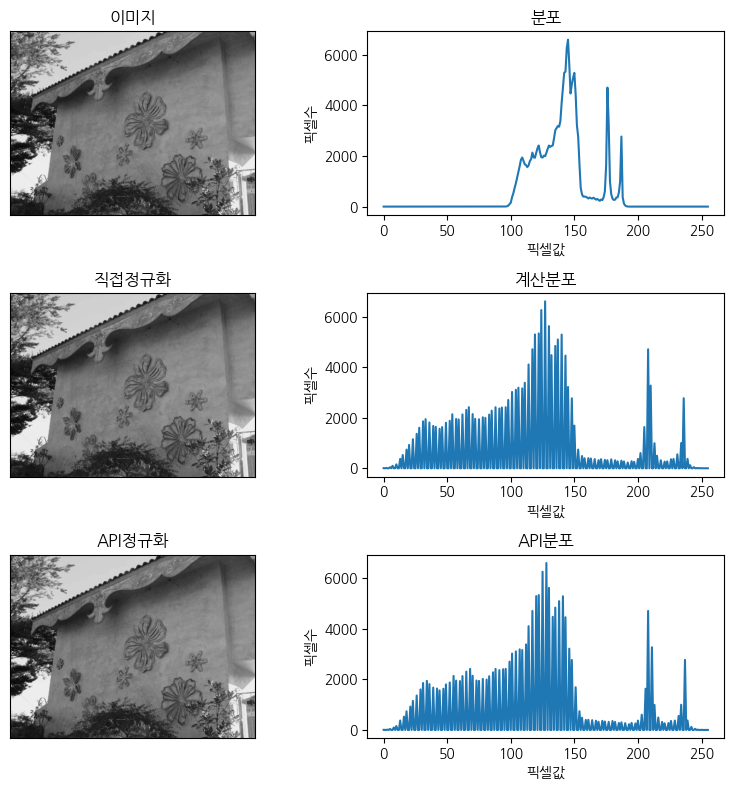

In [ ]:
## ---------------------------------------------------
## 정규화 전 후에 따른 이미지 분포 시각화
## ---------------------------------------------------
fig, axes = plt.subplots(3, 2, figsize=(8, 8))

axes   = axes.flatten()
titles = ['이미지', '분포', '직접정규화', '계산분포', 'API정규화', 'API분포']
images = [img_gray, hist, img_norm, hist_norm, img_norm_api, hist_normapi]
for ax, title, img_data in zip(axes, titles, images):
    ax.set_title(title)
    if '분포' in title:
        ax.plot(img_data)
        ax.set_xlabel("픽셀값")
        ax.set_ylabel("픽셀수")
    else:
        ax.imshow(img_data, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
plt.tight_layout()
plt.show()

